#### Imports

In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *

from MERFISH_Objects.FISHData import *

from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt 

#### Load data

#### Build layers 1-2: cells and zones

In [2]:
TMG = TissueMultiGraph('TMG_dev7.pkl')
TMG.Layers=TMG.Layers[0:2]

#### Build layers 3-4: communities and regions 

In [3]:
%%time
min_neigh_size = 10
min_hz_size = 2
hz_id = TMG.find_heterozones_based_on_coherence()

# hz_id = TMG.refine_heterozone_and_neighborood_layers(min_hz_size = min_hz_size)
# TMG.create_heterozone_and_neighborood_layers(hz_id,min_neigh_size = min_neigh_size)


/home/rwollman/miniconda3/envs/dredFISH/lib/python3.9/site-packages/scipy/spatial/distance.py:1290: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/home/rwollman/miniconda3/envs/dredFISH/lib/python3.9/site-packages/scipy/spatial/distance.py:1291: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Analysis/TissueGraph.py:1060: RuntimeWarning: Mean of empty slice
  Smoothed[j,i+1] = np.nanmean(VecToSmooth[ix])


CPU times: user 1min 11s, sys: 4.26 s, total: 1min 15s
Wall time: 1min 15s


In [4]:
%%time
#,min_neigh_size = min_neigh_size,opt_params = {'iters' : 25, 'n_consensus' : 250}
TMG.create_heterozone_and_neighborood_layers(hz_id)

Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -1.34839        initial
    2        18.5792     -1.40757        golden
    3        22.9416     -1.41881        golden
    4        23.2953     -1.41616        parabolic
    5        21.3641     -1.42394        parabolic
    6        21.4122     -1.43036        parabolic
    7        22.1346       -1.417        parabolic
    8        21.6882     -1.41048        golden
    9        21.5176     -1.41997        golden
   10        21.4323     -1.41929        parabolic
   11        21.4089     -1.43219        parabolic
   12        21.3918     -1.41309        golden
   13        21.4056     -1.42176        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.01 )
Number of types: 134 initial entropy: 1.4321855296509947 number of evals: 13
CPU times: user 22.1 s, sys: 120 ms, total: 22.2 s
Wall time: 22.2 s


In [10]:
# %%time
# hz_id_refined = TMG.refine_heterozone_and_neighborood_layers(min_hz_size = min_hz_size)
# TMG.create_heterozone_and_neighborood_layers(hz_id_refined,min_neigh_size = min_neigh_size)

0: 19.04 flipped: 2611
1: 34.36 flipped: 3726
2: 49.86 flipped: 4263
3: 63.90 flipped: 4531
4: 77.64 flipped: 4670
5: 91.38 flipped: 4751
6: 105.44 flipped: 4780
7: 119.18 flipped: 4790
8: 132.73 flipped: 4790
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -1.54929        initial
    2        18.5792     -1.65896        golden
    3        22.9416     -1.76988        golden
    4        25.6376     -1.79381        golden
    5        26.1824     -1.78145        parabolic
    6        24.7452     -1.78667        parabolic
    7        25.3788     -1.80239        parabolic
    8        25.2531     -1.78348        parabolic
    9        25.4777     -1.79182        golden
   10        25.3308     -1.78672        golden
   11        25.4166     -1.79418        golden
   12        25.3605     -1.78997        golden
   13        25.3932     -1.80134        golden
   14        25.3821     -1.77871        parabolic
   15        25.3755

In [11]:
%%time
TMG.finalize_heterozone_and_neighborhood_layers()

CPU times: user 1min 21s, sys: 71.3 ms, total: 1min 21s
Wall time: 1min 21s


In [6]:
# TMG.save('TMG_dev8.pkl')

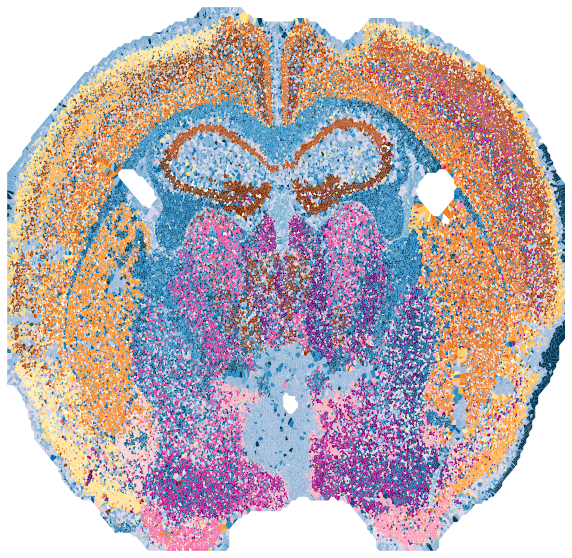

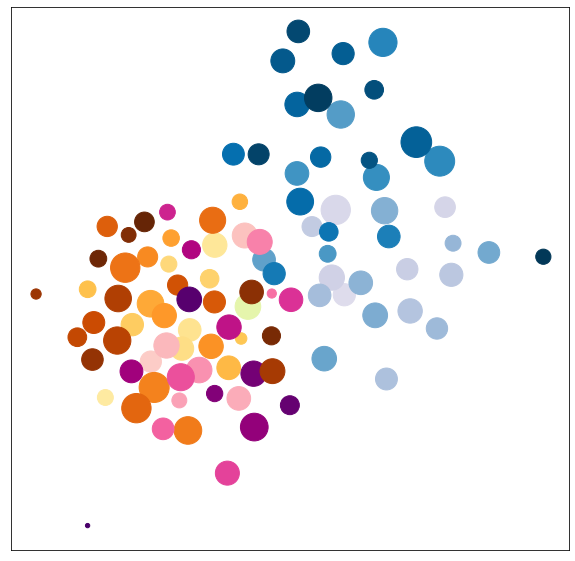

In [7]:
Vcellmap = CellMap(TMG)
Vcellmap.figsize = (10,10)
Vcellmap.cmap_list = ['YlOrBr','RdPu','PuBu','YlGn']
Vcellmap.set_view()
Vcellmap.plot()

/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Visualization/Viz.py:381: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.segs = np.array(self.segs)


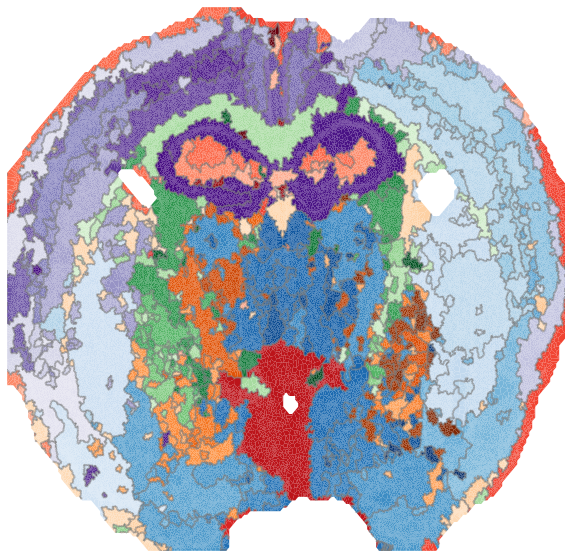

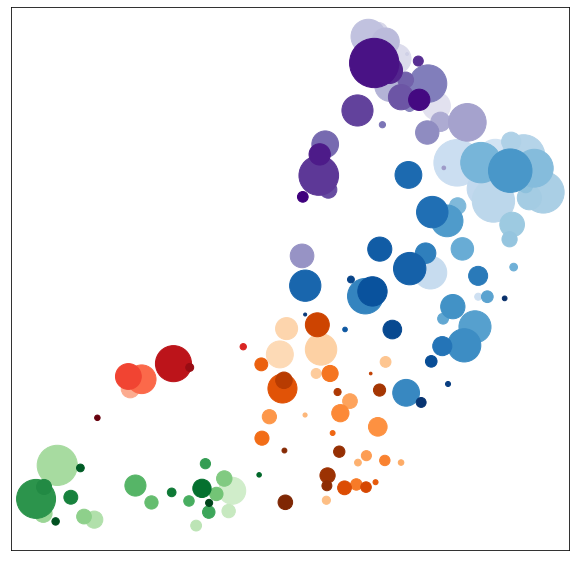

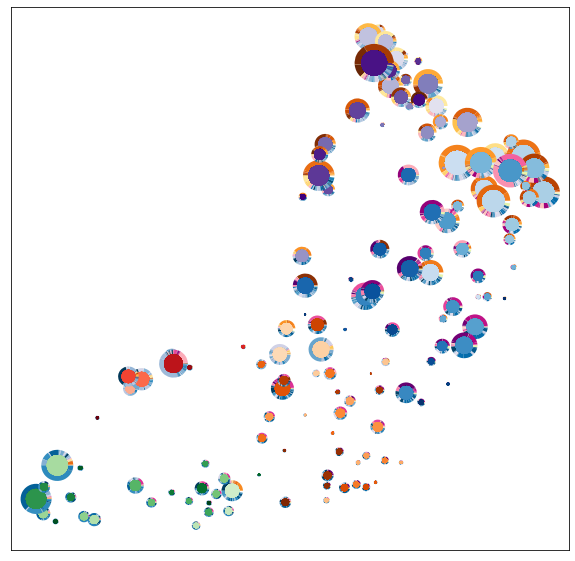

In [8]:
Vneighborhood = NeighborhoodMapWithLines(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Blues','Oranges','Reds','Greens','cividis']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)

/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Visualization/Viz.py:381: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.segs = np.array(self.segs)


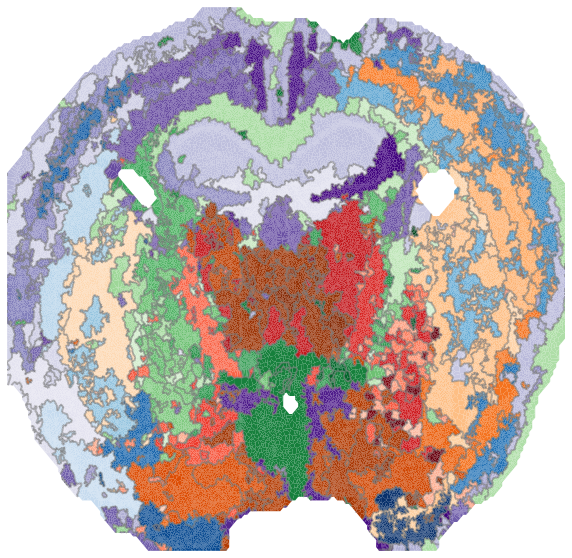

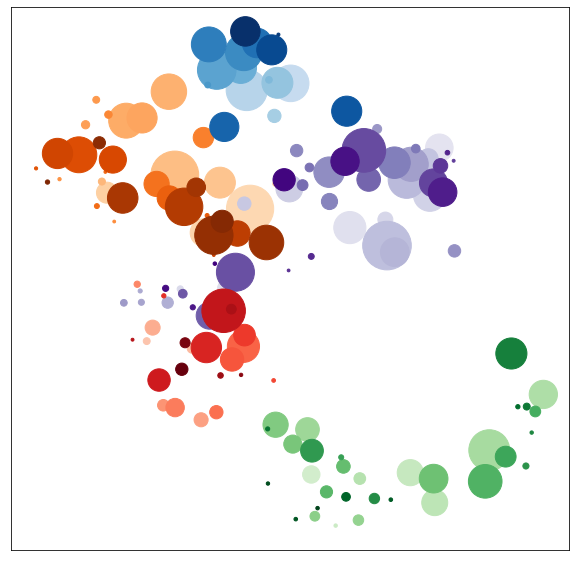

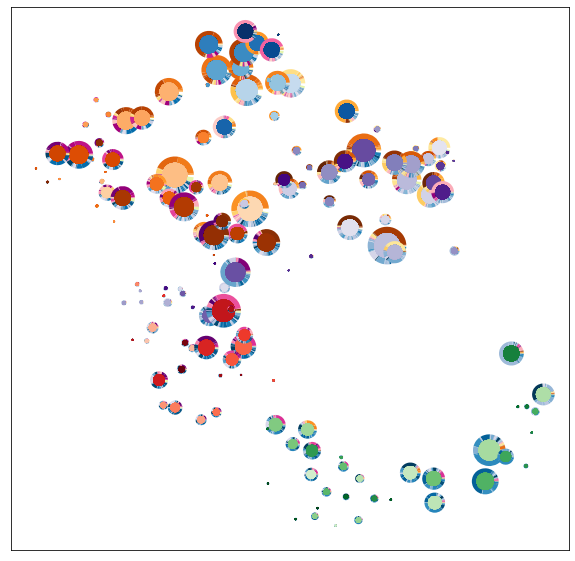

In [12]:
Vneighborhood = NeighborhoodMapWithLines(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Blues','Oranges','Reds','Greens','cividis']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)